In [1]:
!pip install fastf1

zsh:1: command not found: pip


In [2]:
import fastf1.plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'/Users/poddatoorvenkatesh/Desktop/fast f1'

In [3]:
class FastF1:
    def __init__(self, year, event_name, session_type):
        """
        Initializes the FastF1 object by retrieving the session for the given year, event, and session type.

        """
        self.year = year
        self.session = fastf1.get_session(year, event_name, session_type)
        self.schedule = fastf1.get_event_schedule(year)
        self.laps = None

    def load_session(self):
        """
        Loads the session data into memory and stores the laps DataFrame.
        
        """
        self.session.load()
        self.laps = self.session.laps

    def get_events_in_year(self, year):
        """
        Fetch and return the full F1 event schedule (all sessions) for the given year

        """
        events = fastf1.get_event_schedule(year)
        return events

    def get_events_in_country(self, year, country):
        """
        Fetch and return the full F1 event schedule (all sessions) for the given country in perticular year

        """
        schedule = fastf1.get_event_schedule(year)
        events = schedule[schedule['Country'] == country]
        return events['EventName']

    def get_events_country(self, country):
        """
        Fetch and return the full F1 event schedule (all sessions) for the given country

        """
        gp_country = self.schedule[self.schedule['Country'] == country]
        return gp_country['OfficialEventName']

    def session_event(self):
        """
        Returns the event information object for the loaded session.
        
        """
        return self.session.event

    def lap_info(self):
        """
        Provides a summary info of the laps DataFrame including column data types and non-null counts.
        
        """
        return self.laps.info()

    def fastest_lap(self):
        """
        Retrieves the fastest lap from the loaded laps DataFrame.
        
        """
        return self.laps.pick_fastest()

    def average_stint(self):
        """
        Calculates the average stint
        
        """
        df = self.session.laps
        avg_stint = df.groupby('Driver')['LapTime'].mean()
        return avg_stint

    def avg_laptime(self):
        """
        Calculates the average lap time for each driver in seconds.
        
        """
        df = self.session.laps
        avg_laptime = df.groupby('Driver')['LapTime'].mean()
        return avg_laptime.sort_values()

    def teams_sectos(self):
        """
        Compare sector times (S1, S2, S3) across teams

        """
        df = self.session.laps
        teams_sectos = df.groupby('Team')[['Sector1Time', 'Sector2Time', 'Sector3Time']].mean()
        return teams_sectos

    def fastest_laptime(self):
        """
        Calculates the fastest lap time for each driver (and team) in seconds.

        """
        df = self.session.laps
        min_laptime = df.groupby(['Driver', 'Team'])['LapTime'].min()
        return min_laptime

    def pit_stop_count(self):
        """
        Counts the number of pit stops made by each driver during the session.

        """
        pit_stops = self.session.laps[self.session.laps['PitOutTime'].notna()]
        return pit_stops.groupby('Driver').size()

    def compound_data(self):
        """
        Count usage per compound per driver

        """
        df = self.session.laps[['Driver', 'Compound']].dropna()
        compound_usage = df.groupby(['Driver', 'Compound']).size().reset_index(name='Count')
        return compound_usage

    """ 
       calculating outliers 
    """
    def Outliers(self, col):
        Q1 = self.laps[col].quantile(0.25)
        Q3 = self.laps[col].quantile(0.75)
        IQR = Q3 - Q1 # inter quartile range
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers = self.laps[(self.laps[col] < lower_bound) | (self.laps[col] > upper_bound)]
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        return

    def compare_speed_overlay(self, driver1, driver2):
        """
        Plots an overlay comparison of speed vs distance for the fastest laps of two drivers.
        
        """
        lap1 = self.session.laps.pick_drivers(driver1).pick_fastest()
        lap2 = self.session.laps.pick_drivers(driver2).pick_fastest()

        tel1 = lap1.get_car_data().add_distance()
        tel2 = lap2.get_car_data().add_distance()

        plt.figure(figsize=(12, 6))
        plt.plot(tel1['Distance'], tel1['Speed'], label=driver1)
        plt.plot(tel2['Distance'], tel2['Speed'], label=driver2)
        plt.xlabel('Distance (m)')
        plt.ylabel('Speed (km/h)')
        plt.title(f"Speed Comparison: {driver1} vs {driver2}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def driver_position_chart(self):
        """
        Plots the position changes of each driver over laps during the session.
        
        """
        df = self.session.laps
        df = df[df['Position'].notnull()]
        plt.figure(figsize=(12, 6))

        for driver in df['Driver'].unique():
            driver_data = df[df['Driver'] == driver]
            plt.plot(driver_data['LapNumber'], driver_data['Position'], label=driver)
            plt.text(driver_data['LapNumber'].iloc[-1] + 0.2, driver_data['Position'].iloc[-1], driver,
                     verticalalignment='center')

        plt.gca().invert_yaxis()
        plt.xlabel("Lap")
        plt.ylabel("Position")
        plt.title(f"{self.session.event['EventName']} {self.year} - Position Changes")
        plt.tight_layout()
        plt.show()


In [4]:
f1 = FastF1(2021, "Italian Grand Prix", "R")

req         WARNING 	DEFAULT CACHE ENABLED! (272.82 MB) /Users/poddatoorvenkatesh/Library/Caches/fastf1


In [5]:
f1.load_session()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 3 completed the race distance 00:00.086000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5',

In [6]:
f1.session_event()

RoundNumber                                                    14
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 HEINEKEN GRAN PREMIO D’ITALIA 2021
EventDate                                     2021-09-12 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                                sprint
Session1                                               Practice 1
Session1Date                            2021-09-10 14:30:00+02:00
Session1DateUtc                               2021-09-10 12:30:00
Session2                                               Qualifying
Session2Date                            2021-09-10 18:00:00+02:00
Session2DateUtc                               2021-09-10 16:00:00
Session3                                               Practice 2
Session3Date                            2021-09-11 12:00:00+02:00
Session3Da

In [7]:
f1.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:16.945000,GAS,10,0 days 00:02:02.171000,1.0,1.0,0 days 01:02:22.702000,NaT,NaT,0 days 00:00:31.018000,...,True,AlphaTauri,0 days 01:02:14.632000,2021-09-12 13:03:16.241,1267,18.0,False,,False,False
1,0 days 01:05:45.950000,GAS,10,0 days 00:01:29.005000,2.0,1.0,NaT,NaT,0 days 00:00:28.594000,0 days 00:00:30.877000,...,True,AlphaTauri,0 days 01:04:16.945000,2021-09-12 13:05:18.554,1,18.0,False,,False,True
2,0 days 01:07:35.123000,GAS,10,0 days 00:01:49.173000,3.0,1.0,NaT,0 days 01:07:31.414000,0 days 00:00:28.479000,0 days 00:00:37.644000,...,True,AlphaTauri,0 days 01:05:45.950000,2021-09-12 13:06:47.559,1,18.0,False,,False,False
3,0 days 01:04:05.126000,PER,11,0 days 00:01:50.352000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:31.553000,...,True,Red Bull Racing,0 days 01:02:14.632000,2021-09-12 13:03:16.241,1267,7.0,False,,False,False
4,0 days 01:05:32.732000,PER,11,0 days 00:01:27.606000,2.0,1.0,NaT,NaT,0 days 00:00:29.036000,0 days 00:00:29.775000,...,True,Red Bull Racing,0 days 01:04:05.126000,2021-09-12 13:05:06.735,71,7.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0 days 02:18:52.452000,GIO,99,0 days 00:01:26.226000,49.0,3.0,NaT,NaT,0 days 00:00:28.374000,0 days 00:00:29.317000,...,True,Alfa Romeo Racing,0 days 02:17:26.226000,2021-09-12 14:18:27.835,1,13.0,False,,False,True
888,0 days 02:20:18.170000,GIO,99,0 days 00:01:25.718000,50.0,3.0,NaT,NaT,0 days 00:00:27.901000,0 days 00:00:29.181000,...,True,Alfa Romeo Racing,0 days 02:18:52.452000,2021-09-12 14:19:54.061,1,13.0,False,,False,True
889,0 days 02:21:44.029000,GIO,99,0 days 00:01:25.859000,51.0,3.0,NaT,NaT,0 days 00:00:28.136000,0 days 00:00:29.331000,...,True,Alfa Romeo Racing,0 days 02:20:18.170000,2021-09-12 14:21:19.779,1,13.0,False,,False,True
890,0 days 02:23:10.182000,GIO,99,0 days 00:01:26.153000,52.0,3.0,NaT,NaT,0 days 00:00:28.041000,0 days 00:00:29.383000,...,True,Alfa Romeo Racing,0 days 02:21:44.029000,2021-09-12 14:22:45.638,1,13.0,False,,False,True


In [8]:
f1.lap_info()

<class 'fastf1.core.Laps'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                892 non-null    timedelta64[ns]
 1   Driver              892 non-null    object         
 2   DriverNumber        892 non-null    object         
 3   LapTime             856 non-null    timedelta64[ns]
 4   LapNumber           892 non-null    float64        
 5   Stint               892 non-null    float64        
 6   PitOutTime          22 non-null     timedelta64[ns]
 7   PitInTime           23 non-null     timedelta64[ns]
 8   Sector1Time         870 non-null    timedelta64[ns]
 9   Sector2Time         889 non-null    timedelta64[ns]
 10  Sector3Time         889 non-null    timedelta64[ns]
 11  Sector1SessionTime  868 non-null    timedelta64[ns]
 12  Sector2SessionTime  889 non-null    timedelta64[ns]
 13  Sector3SessionTime  889 non-null    timedelta6

In [9]:
f1.fastest_lap()

Time                      0 days 02:24:09.131000
Driver                                       RIC
DriverNumber                                   3
LapTime                   0 days 00:01:24.812000
LapNumber                                   53.0
Stint                                        2.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.077000
Sector2Time               0 days 00:00:28.798000
Sector3Time               0 days 00:00:27.937000
Sector1SessionTime        0 days 02:23:12.409000
Sector2SessionTime        0 days 02:23:41.207000
Sector3SessionTime        0 days 02:24:09.144000
SpeedI1                                    311.0
SpeedI2                                    310.0
SpeedFL                                    297.0
SpeedST                                    317.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife            

In [10]:
f1.average_stint()

Driver
ALO   0 days 00:01:30.677686274
BOT   0 days 00:01:30.383313725
GAS      0 days 00:01:46.783000
GIO   0 days 00:01:32.100634615
HAM      0 days 00:01:27.689400
KUB   0 days 00:01:30.918745098
LAT   0 days 00:01:30.770058823
LEC   0 days 00:01:27.710979591
MAZ      0 days 00:01:34.472400
MSC   0 days 00:01:32.557807692
NOR      0 days 00:01:29.179500
OCO   0 days 00:01:30.690156862
PER   0 days 00:01:30.147274509
RIC   0 days 00:01:27.777428571
RUS   0 days 00:01:30.682823529
SAI   0 days 00:01:30.487294117
STR   0 days 00:01:30.619450980
TSU                         NaT
VER      0 days 00:01:28.549920
VET   0 days 00:01:32.046923076
Name: LapTime, dtype: timedelta64[ns]

In [81]:
f1.avg_laptime()

Driver
HAM      0 days 00:01:27.689400
LEC   0 days 00:01:27.710979591
RIC   0 days 00:01:27.777428571
VER      0 days 00:01:28.549920
NOR      0 days 00:01:29.179500
PER   0 days 00:01:30.147274509
BOT   0 days 00:01:30.383313725
SAI   0 days 00:01:30.487294117
STR   0 days 00:01:30.619450980
ALO   0 days 00:01:30.677686274
RUS   0 days 00:01:30.682823529
OCO   0 days 00:01:30.690156862
LAT   0 days 00:01:30.770058823
KUB   0 days 00:01:30.918745098
VET   0 days 00:01:32.046923076
GIO   0 days 00:01:32.100634615
MSC   0 days 00:01:32.557807692
MAZ      0 days 00:01:34.472400
GAS      0 days 00:01:46.783000
TSU                         NaT
Name: LapTime, dtype: timedelta64[ns]

In [82]:
f1.teams_sectos()

,Sector1Time,Sector2Time,Sector3Time
Team,,,
Alfa Romeo Racing,0 days 00:00:30.285836538,0 days 00:00:31.794867924,0 days 00:00:31.141226415
AlphaTauri,0 days 00:00:28.536500,0 days 00:00:33.179666666,0 days 00:00:42.097333333
Alpine,0 days 00:00:30.196653846,0 days 00:00:31.804207547,0 days 00:00:31.034971698
Aston Martin,0 days 00:00:30.426711538,0 days 00:00:31.661433962,0 days 00:00:30.980330188
Ferrari,0 days 00:00:30.047567307,0 days 00:00:31.634575471,0 days 00:00:31.184075471
Haas F1 Team,0 days 00:00:30.631934782,0 days 00:00:31.860861702,0 days 00:00:32.116723404
McLaren,0 days 00:00:30.093490384,0 days 00:00:31.751981132,0 days 00:00:30.898509433
Mercedes,0 days 00:00:29.291868421,0 days 00:00:31.220089743,0 days 00:00:30.589153846
Red Bull Racing,0 days 00:00:29.786921052,0 days 00:00:31.057358974,0 days 00:00:30.557064102


In [83]:
f1.get_events_in_year(2021)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Bahrain,FORMULA 1 ARAMCO PRE-SEASON TESTING 2021,2021-03-14,Pre-Season Test,testing,Practice 1,2021-03-12 10:00:00+03:00,2021-03-12 07:00:00,...,Practice 3,2021-03-14 10:00:00+03:00,2021-03-14 07:00:00,None,NaT,NaT,None,NaT,NaT,False
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021,2021-03-28,Bahrain Grand Prix,conventional,Practice 1,2021-03-26 14:30:00+03:00,2021-03-26 11:30:00,...,Practice 3,2021-03-27 15:00:00+03:00,2021-03-27 12:00:00,Qualifying,2021-03-27 18:00:00+03:00,2021-03-27 15:00:00,Race,2021-03-28 18:00:00+03:00,2021-03-28 15:00:00,True
2,2,Italy,Imola,FORMULA 1 PIRELLI GRAN PREMIO DEL MADE IN ITAL...,2021-04-18,Emilia Romagna Grand Prix,conventional,Practice 1,2021-04-16 11:00:00+02:00,2021-04-16 09:00:00,...,Practice 3,2021-04-17 11:00:00+02:00,2021-04-17 09:00:00,Qualifying,2021-04-17 14:00:00+02:00,2021-04-17 12:00:00,Race,2021-04-18 15:00:00+02:00,2021-04-18 13:00:00,True
3,3,Portugal,Portimão,FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2021,2021-05-02,Portuguese Grand Prix,conventional,Practice 1,2021-04-30 11:30:00+01:00,2021-04-30 10:30:00,...,Practice 3,2021-05-01 12:00:00+01:00,2021-05-01 11:00:00,Qualifying,2021-05-01 15:00:00+01:00,2021-05-01 14:00:00,Race,2021-05-02 15:00:00+01:00,2021-05-02 14:00:00,True
4,4,Spain,Barcelona,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2021,2021-05-09,Spanish Grand Prix,conventional,Practice 1,2021-05-07 11:30:00+02:00,2021-05-07 09:30:00,...,Practice 3,2021-05-08 12:00:00+02:00,2021-05-08 10:00:00,Qualifying,2021-05-08 15:00:00+02:00,2021-05-08 13:00:00,Race,2021-05-09 15:00:00+02:00,2021-05-09 13:00:00,True
5,5,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2021,2021-05-23,Monaco Grand Prix,conventional,Practice 1,2021-05-20 11:30:00+02:00,2021-05-20 09:30:00,...,Practice 3,2021-05-22 12:00:00+02:00,2021-05-22 10:00:00,Qualifying,2021-05-22 15:00:00+02:00,2021-05-22 13:00:00,Race,2021-05-23 15:00:00+02:00,2021-05-23 13:00:00,True
6,6,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2021,2021-06-06,Azerbaijan Grand Prix,conventional,Practice 1,2021-06-04 12:30:00+04:00,2021-06-04 08:30:00,...,Practice 3,2021-06-05 13:00:00+04:00,2021-06-05 09:00:00,Qualifying,2021-06-05 16:00:00+04:00,2021-06-05 12:00:00,Race,2021-06-06 16:00:00+04:00,2021-06-06 12:00:00,True
7,7,France,Le Castellet,FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021,2021-06-20,French Grand Prix,conventional,Practice 1,2021-06-18 11:30:00+02:00,2021-06-18 09:30:00,...,Practice 3,2021-06-19 12:00:00+02:00,2021-06-19 10:00:00,Qualifying,2021-06-19 15:00:00+02:00,2021-06-19 13:00:00,Race,2021-06-20 15:00:00+02:00,2021-06-20 13:00:00,True
8,8,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS DER STEIERMARK 2021,2021-06-27,Styrian Grand Prix,conventional,Practice 1,2021-06-25 11:30:00+02:00,2021-06-25 09:30:00,...,Practice 3,2021-06-26 12:00:00+02:00,2021-06-26 10:00:00,Qualifying,2021-06-26 15:00:00+02:00,2021-06-26 13:00:00,Race,2021-06-27 15:00:00+02:00,2021-06-27 13:00:00,True
9,9,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS VON ÖSTERREICH 2021,2021-07-04,Austrian Grand Prix,conventional,Practice 1,2021-07-02 11:30:00+02:00,2021-07-02 09:30:00,...,Practice 3,2021-07-03 12:00:00+02:00,2021-07-03 10:00:00,Qualifying,2021-07-03 15:00:00+02:00,2021-07-03 13:00:00,Race,2021-07-04 15:00:00+02:00,2021-07-04 13:00:00,True


In [84]:
f1.get_events_in_country(2021, 'United States')


17    United States Grand Prix
Name: EventName, dtype: object

In [85]:
f1.get_events_country('Mexico')

18    FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2021
Name: OfficialEventName, dtype: object

In [88]:
f1.fastest_laptime()

Driver  Team             
RIC     McLaren              84.812
BOT     Mercedes             84.827
NOR     McLaren              84.971
PER     Red Bull Racing      85.156
VER     Red Bull Racing      85.173
LEC     Ferrari              85.319
ALO     Alpine               85.472
SAI     Ferrari              85.559
OCO     Alpine               85.566
GIO     Alfa Romeo Racing    85.718
RUS     Williams             85.835
KUB     Alfa Romeo Racing    85.849
STR     Aston Martin         85.853
HAM     Mercedes             85.870
VET     Aston Martin         85.938
LAT     Williams             85.953
MSC     Haas F1 Team         86.707
MAZ     Haas F1 Team         87.202
GAS     AlphaTauri           89.005
TSU     AlphaTauri              NaN
Name: LapTime, dtype: float64

In [93]:
f1.pit_stop_count()

Driver
ALO    1
BOT    1
GAS    1
GIO    2
KUB    1
LAT    1
LEC    1
MAZ    3
MSC    1
NOR    1
OCO    1
PER    1
RIC    1
RUS    1
SAI    1
STR    1
VER    1
VET    2
dtype: int64

In [98]:
f1.compound_data()

,Driver,Compound,Count
0,ALO,HARD,28
1,ALO,MEDIUM,25
2,BOT,HARD,26
3,BOT,MEDIUM,27
4,GAS,HARD,3
5,GIO,HARD,24
6,GIO,MEDIUM,29
7,HAM,HARD,25
8,KUB,HARD,26
9,KUB,MEDIUM,27


In [7]:
f1.Outliers('Stint')

Lower Bound: -0.5
Upper Bound: 3.5
Number of outliers: 3


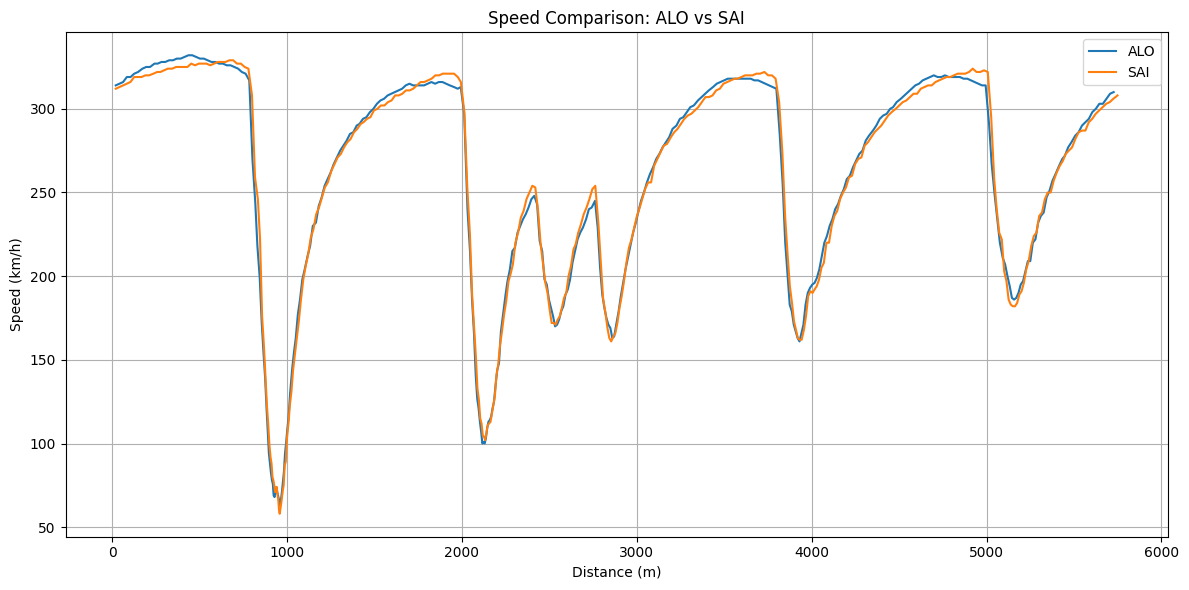

In [104]:
f1.compare_speed_overlay('ALO','SAI')

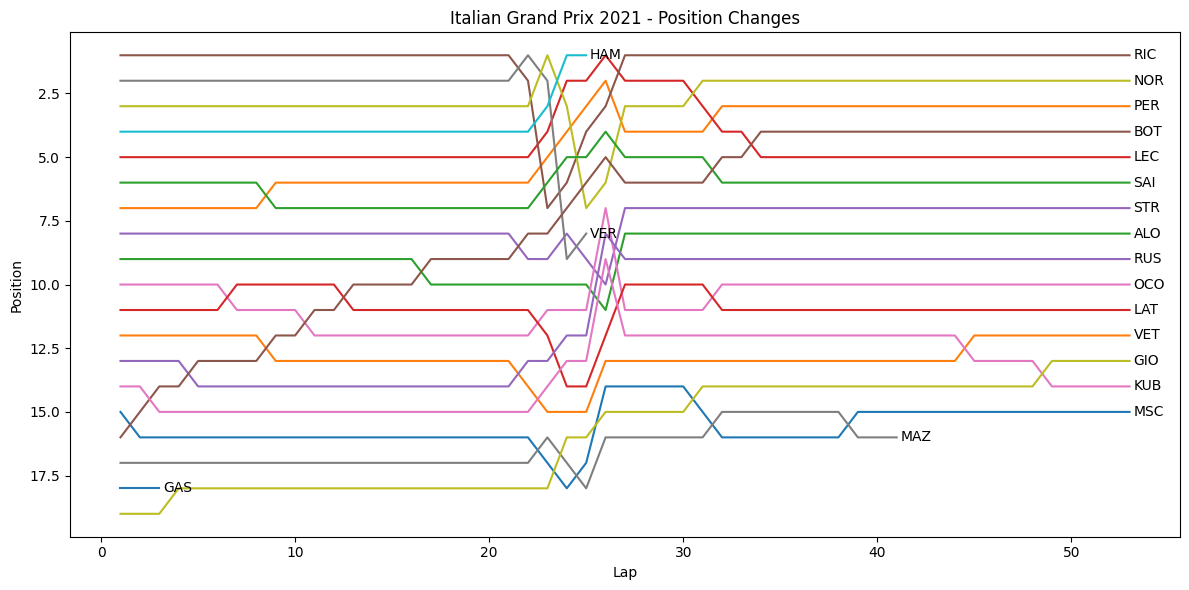

In [108]:
f1.driver_position_chart()

In [11]:
laps_data = f1.laps
laps_data

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:16.945000,GAS,10,0 days 00:02:02.171000,1.0,1.0,0 days 01:02:22.702000,NaT,NaT,0 days 00:00:31.018000,...,True,AlphaTauri,0 days 01:02:14.632000,2021-09-12 13:03:16.241,1267,18.0,False,,False,False
1,0 days 01:05:45.950000,GAS,10,0 days 00:01:29.005000,2.0,1.0,NaT,NaT,0 days 00:00:28.594000,0 days 00:00:30.877000,...,True,AlphaTauri,0 days 01:04:16.945000,2021-09-12 13:05:18.554,1,18.0,False,,False,True
2,0 days 01:07:35.123000,GAS,10,0 days 00:01:49.173000,3.0,1.0,NaT,0 days 01:07:31.414000,0 days 00:00:28.479000,0 days 00:00:37.644000,...,True,AlphaTauri,0 days 01:05:45.950000,2021-09-12 13:06:47.559,1,18.0,False,,False,False
3,0 days 01:04:05.126000,PER,11,0 days 00:01:50.352000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:31.553000,...,True,Red Bull Racing,0 days 01:02:14.632000,2021-09-12 13:03:16.241,1267,7.0,False,,False,False
4,0 days 01:05:32.732000,PER,11,0 days 00:01:27.606000,2.0,1.0,NaT,NaT,0 days 00:00:29.036000,0 days 00:00:29.775000,...,True,Red Bull Racing,0 days 01:04:05.126000,2021-09-12 13:05:06.735,71,7.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0 days 02:18:52.452000,GIO,99,0 days 00:01:26.226000,49.0,3.0,NaT,NaT,0 days 00:00:28.374000,0 days 00:00:29.317000,...,True,Alfa Romeo Racing,0 days 02:17:26.226000,2021-09-12 14:18:27.835,1,13.0,False,,False,True
888,0 days 02:20:18.170000,GIO,99,0 days 00:01:25.718000,50.0,3.0,NaT,NaT,0 days 00:00:27.901000,0 days 00:00:29.181000,...,True,Alfa Romeo Racing,0 days 02:18:52.452000,2021-09-12 14:19:54.061,1,13.0,False,,False,True
889,0 days 02:21:44.029000,GIO,99,0 days 00:01:25.859000,51.0,3.0,NaT,NaT,0 days 00:00:28.136000,0 days 00:00:29.331000,...,True,Alfa Romeo Racing,0 days 02:20:18.170000,2021-09-12 14:21:19.779,1,13.0,False,,False,True
890,0 days 02:23:10.182000,GIO,99,0 days 00:01:26.153000,52.0,3.0,NaT,NaT,0 days 00:00:28.041000,0 days 00:00:29.383000,...,True,Alfa Romeo Racing,0 days 02:21:44.029000,2021-09-12 14:22:45.638,1,13.0,False,,False,True


In [13]:
import re
import psycopg2

# --- 1. Sanitize table name (important!) ---
table_name = 'fastf1_laps'
clean_table_name = re.sub(r'\W+', '_', table_name)  # Replace special chars with underscores

# --- 2. Infer SQL types from pandas dtypes ---
def infer_sql_types(dtype):
    import pandas as pd
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

columns = laps_data.dtypes
sql_columns = ',\n '.join([f'"{col}" {infer_sql_types(dtype)}' for col, dtype in columns.items()])

# --- 3. Generate CREATE TABLE statement ---
create_stmt = f"""
CREATE TABLE IF NOT EXISTS {clean_table_name} (
 {sql_columns}
);
"""

# --- 4. Connect to PostgreSQL ---
conn = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="@Venkat2252",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

# --- 5. Create table ---
cur.execute(create_stmt)
conn.commit()

# --- 6. Prepare INSERT statement ---
columns_list = list(laps_data.columns)
placeholders = ', '.join(['%s'] * len(columns_list))
insert_stmt = f"""
INSERT INTO {clean_table_name} ({', '.join(['"{}"'.format(col) for col in columns_list])})
VALUES ({placeholders});
"""

# --- 7. Insert data efficiently (bulk insert) ---
data = [tuple(row) for row in laps_data.to_numpy()]
cur.executemany(insert_stmt, data)
conn.commit()

cur.close()
conn.close()

print(f"✅ Data inserted successfully into table: {clean_table_name}")

InvalidDatetimeFormat: invalid input syntax for type timestamp: "NaT"
LINE 3: ...1.0, 1.0, '0 days 3742.702000 seconds'::interval, 'NaT'::tim...
                                                             ^


In [14]:
import re
import pandas as pd
import numpy as np
import psycopg2
from psycopg2 import sql

# --- 1. Sanitize table name ---
table_name = 'fastf1_laps'
clean_table_name = re.sub(r'\W+', '_', table_name)

# --- 2. Infer SQL types from pandas dtypes ---
def infer_sql_types(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

# --- 3. Build CREATE TABLE statement ---
columns = laps_data.dtypes
sql_columns = ',\n '.join([f'"{col}" {infer_sql_types(dtype)}' for col, dtype in columns.items()])

create_stmt = f"""
CREATE TABLE IF NOT EXISTS {clean_table_name} (
 {sql_columns}
);
"""

# --- 4. Connect and insert data ---
conn = None
try:
    conn = psycopg2.connect(
        dbname="postgres",
        user="postgres",
        password="@Venkat2252",
        host="localhost",
        port="5432"
    )
    cur = conn.cursor()

    # Create table
    cur.execute(create_stmt)
    conn.commit()

    # Prepare INSERT statement safely
    columns_list = list(laps_data.columns)
    placeholders = ', '.join(['%s'] * len(columns_list))
    insert_stmt = sql.SQL("INSERT INTO {} ({}) VALUES ({})").format(
        sql.Identifier(clean_table_name),
        sql.SQL(', ').join(map(sql.Identifier, columns_list)),
        sql.SQL(placeholders)
    )

    # Replace NaN with None to avoid insert errors
    data = [tuple(None if pd.isna(x) else x for x in row) for row in laps_data.to_numpy()]

    # Bulk insert
    cur.executemany(insert_stmt.as_string(conn), data)
    conn.commit()

    print(f"✅ Data inserted successfully into table: {clean_table_name}")

except Exception as e:
    print(f"❌ Error: {e}")
    if conn:
        conn.rollback()
finally:
    if conn:
        cur.close()
        conn.close()


✅ Data inserted successfully into table: fastf1_laps


In [16]:
# To download data in csv file
laps_data.to_csv("laps_data.csv", index=False)
